<a href="https://colab.research.google.com/github/caroAM22/Trabajo_VA/blob/main/Trabajo_vision_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1><center>Trabajo Visión Artificial </center></h1>**

**<h1><center> 2023-2s </center></h1>**
---


---


# Programa para detectar la calidad de los neumáticos

---


## Integrantes:

*   **Carolina Alvarez Murillo**  Ingeniería de sistemas e informática
*   **Mateo Alvarez Murillo**  Ingeniería de sistemas e informática
*   **Cristian Londoño Franco**  Ingeniería de sistemas e informática
*   **Miguel Angel Martinez Arenas**  Ingeniería física



# DATASET

Desarrollaremos el programa para el reconocimiento de neumáticos defectuosos con el dataset [Tyre Quality Classification](https://www.kaggle.com/datasets/warcoder/tyre-quality-classification) obtenido de [Kaggle](https://www.kaggle.com/) el cual está compuesto de 1854 imágenes digitales en formato jpg, en cada una se visualiza un solo neumático o partes de uno. Están etiquetadas, según su estado, 1028 imágenes clasificadas como defectuosas y 828 como buenas. El objetivo del conjunto de datos es facilitar el desarrollo de sistemas de inspección más precisos y eficientes para la producción de neumáticos.

# Objetivo

Mejorar el proceso de control de calidad de la industria de neumáticos y reducir las posibilidades de accidentes debido a neumáticos defectuosos.

# Metodología

En el proceso de análisis de un dataset de imágenes de llantas defectuosas y en buen estado, se realizaron las siguientes etapas:

* Lectura y carga de las imágenes.
* Redimensionamiento a un tamaño uniforme.
* Prueba de diferentes espacios y canales de color.

## Librerías

In [1]:
#Importamos las librerías que vamos a utilizar

import os
import pandas as pd
import numpy as np
import cv2
from google.colab import drive
import matplotlib.pyplot as plt

## Lectura de imagenes desde drive

In [5]:
#Obtenemos el conjunto de datos desde nuestras cuentas de drive, donde previamente descargamos el dataset.

drive.mount("/content/drive")
path_defective = "/content/drive/Shareddrives/Visión artificial/Dataset/defective"
path_good = "/content/drive/Shareddrives/Visión artificial/Dataset/good"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lectura de imágenes y estandarización del tamaño

In [6]:
# Función para leer y redimensionar el tamaño de las imagenes

def read_and_resize_images(folder, new_width, new_height):
    #Creamos una lista para almacenar las imagenes
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            #Se lee la imagen de la ruta
            image = cv2.imread(os.path.join(folder, filename))
            if image is not None:
                #Se redimensiona y se guarda en la lista
                resized_image = cv2.resize(image, (new_width, new_height))
                images.append(resized_image)
    return images

#Establecemos un tamaño de ancho y largo para las imagenes
new_width = 128
new_height = 128

#Llamamos la función para ambos conjuntos de datos
defective_images = read_and_resize_images(path_defective, new_width, new_height)
good_images = read_and_resize_images(path_good, new_width, new_height)

Visualización de las imagenes

In [7]:
# Función para mostrar algunas imagenes del dataset

def show_images(n, m, images, title):
  fig, ax = plt.subplots(4,5, figsize = (10,10))
  im = 0
  fig.suptitle(title, fontsize=40)

  for i in range (0,n):
    for j in range (0,m):
      img_rgb = cv2.cvtColor(images[j+im], cv2.COLOR_BGR2RGB)
      ax[i,j].imshow(img_rgb)
      ax[i,j].set_axis_off()
    im += 5

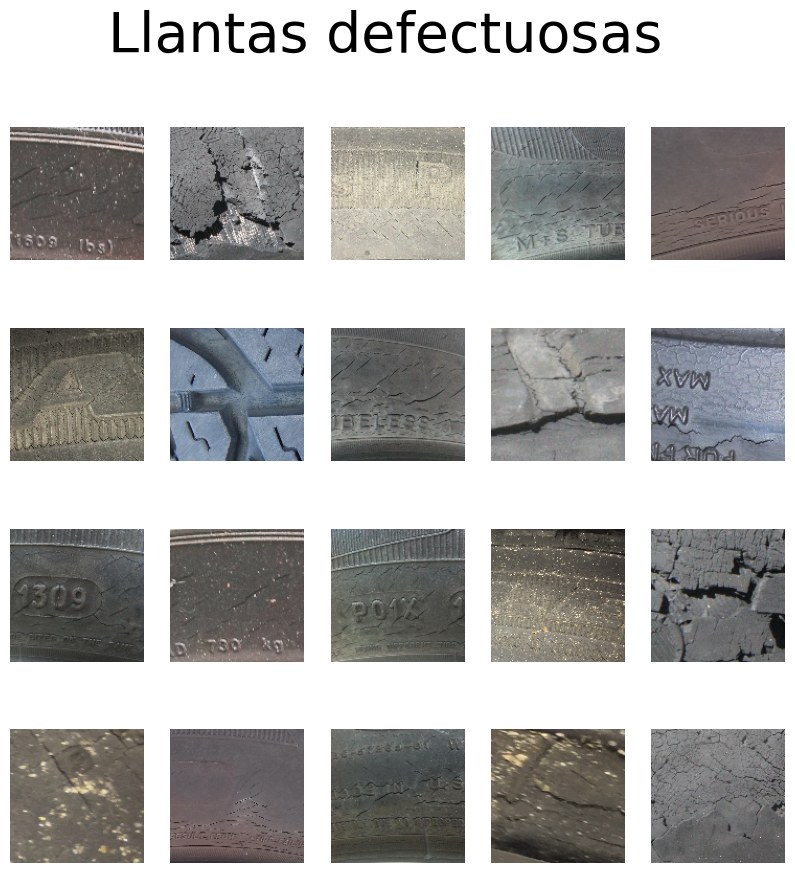

In [8]:
# Visualizacion de llantas defectuosas
show_images(4, 5, defective_images, 'Llantas defectuosas')

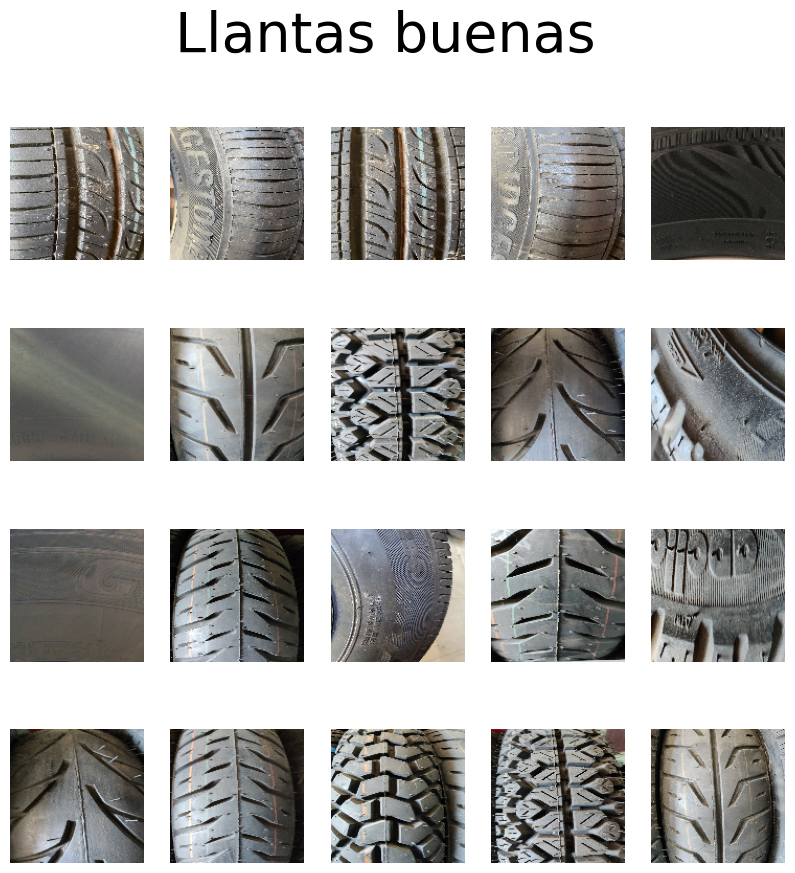

In [9]:
# Visualizacion de llantas buenas
show_images(4, 5, good_images, 'Llantas buenas')

## Análisis del canal

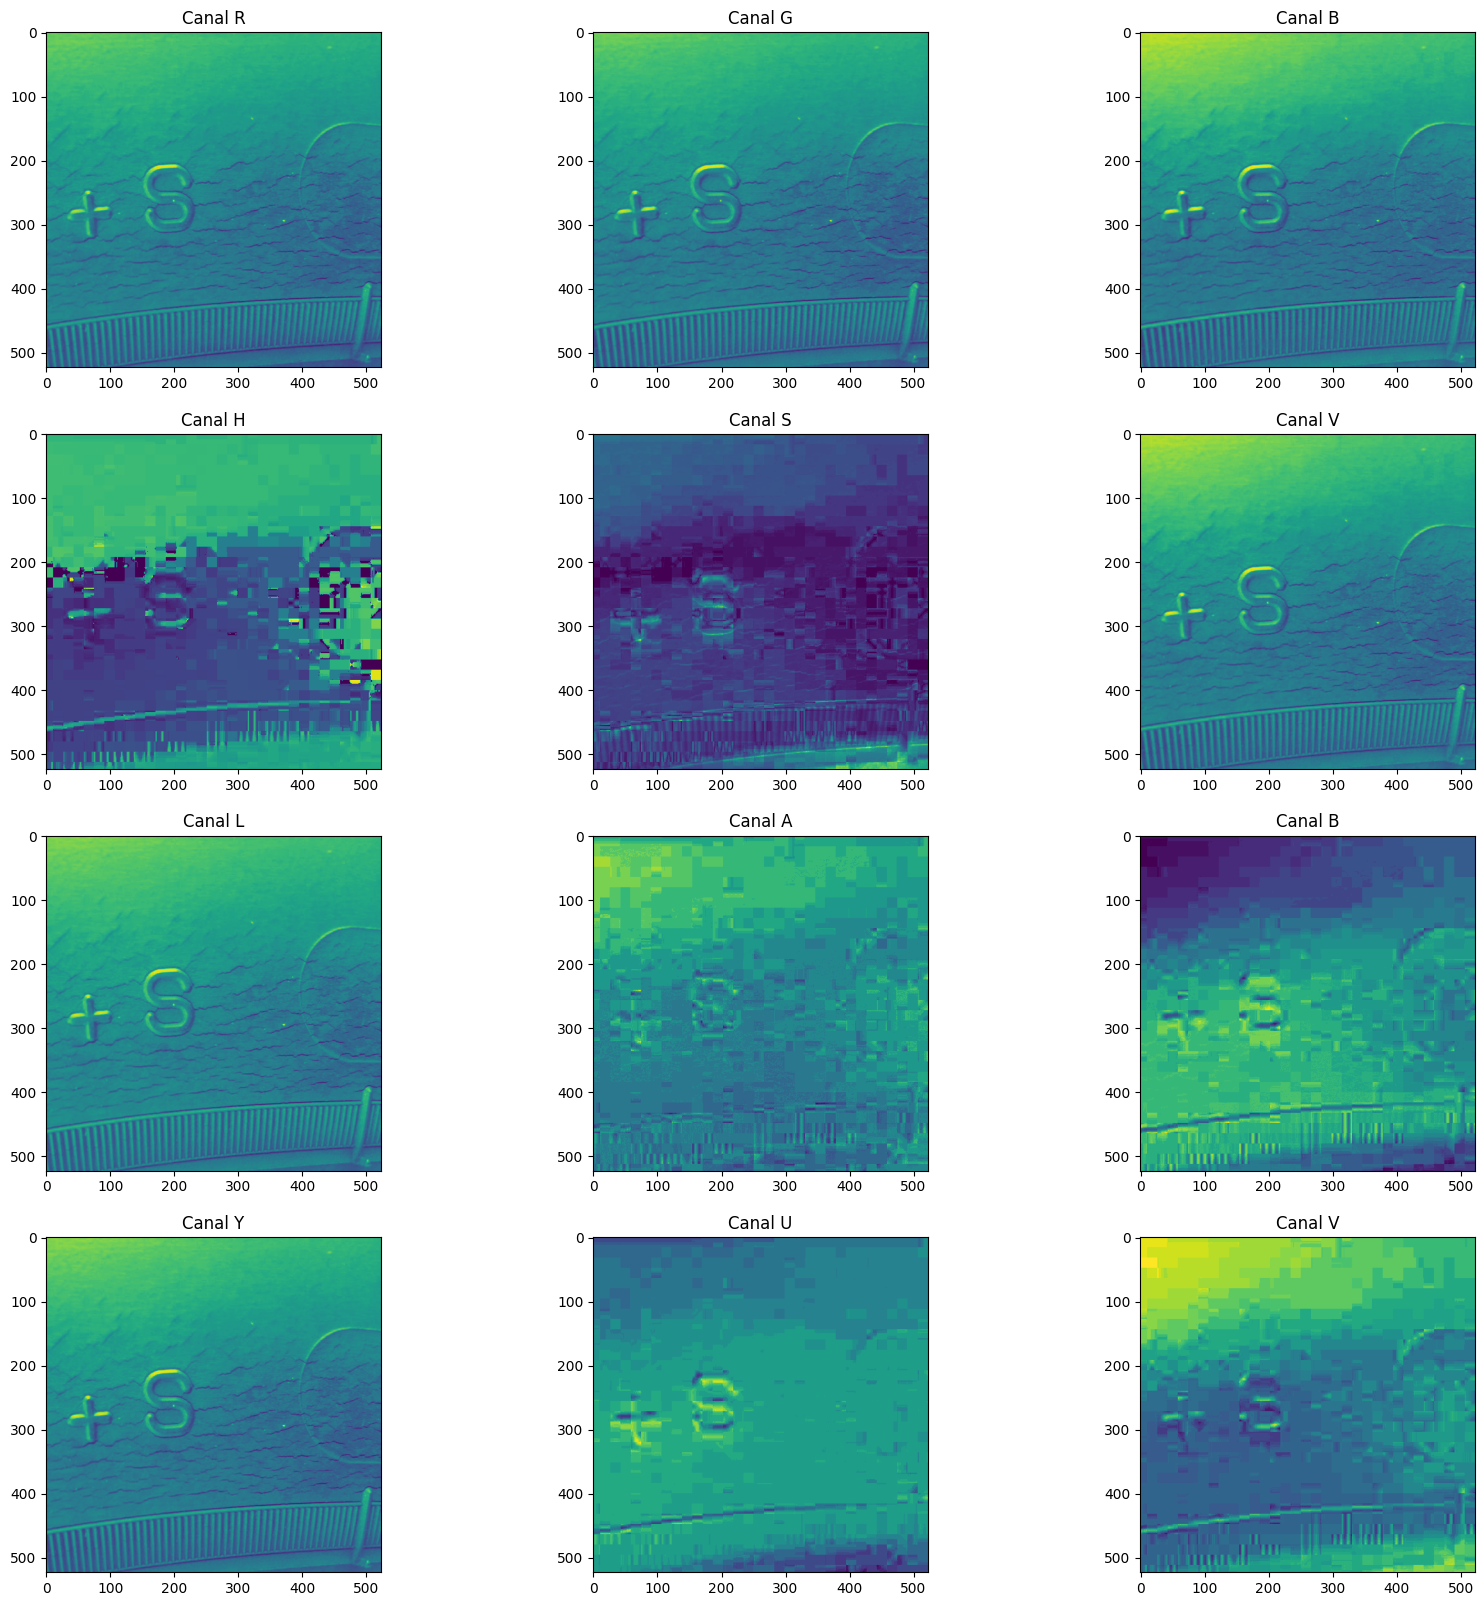

In [10]:
#Leemos una imagen del conjunto defectuoso y aplicamos los canales de color

img = cv2.imread(path_defective+"/Defective (1000).jpg")
fig, ax = plt.subplots(4,3, figsize = (20,20))

#Canal RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ax[0,0].imshow(img_rgb[:,:,0])
ax[0,0].set_title("Canal R")
ax[0,1].imshow(img_rgb[:,:,1])
ax[0,1].set_title("Canal G")
ax[0,2].imshow(img_rgb[:,:,2])
ax[0,2].set_title("Canal B")

#Canal HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

ax[1,0].imshow(img_hsv[:,:,0])
ax[1,0].set_title("Canal H")
ax[1,1].imshow(img_hsv[:,:,1])
ax[1,1].set_title("Canal S")
ax[1,2].imshow(img_hsv[:,:,2])
ax[1,2].set_title("Canal V")

#Canal LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

ax[2,0].imshow(img_lab[:,:,0])
ax[2,0].set_title("Canal L")
ax[2,1].imshow(img_lab[:,:,1])
ax[2,1].set_title("Canal A")
ax[2,2].imshow(img_lab[:,:,2])
ax[2,2].set_title("Canal B")

#Canal YUV
img_yuv  = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

ax[3,0].imshow(img_yuv[:,:,0])
ax[3,0].set_title("Canal Y")
ax[3,1].imshow(img_yuv[:,:,1])
ax[3,1].set_title("Canal U")
ax[3,2].imshow(img_yuv[:,:,2])
ax[3,2].set_title("Canal V")

plt.show()

## Análisis del espacio de color

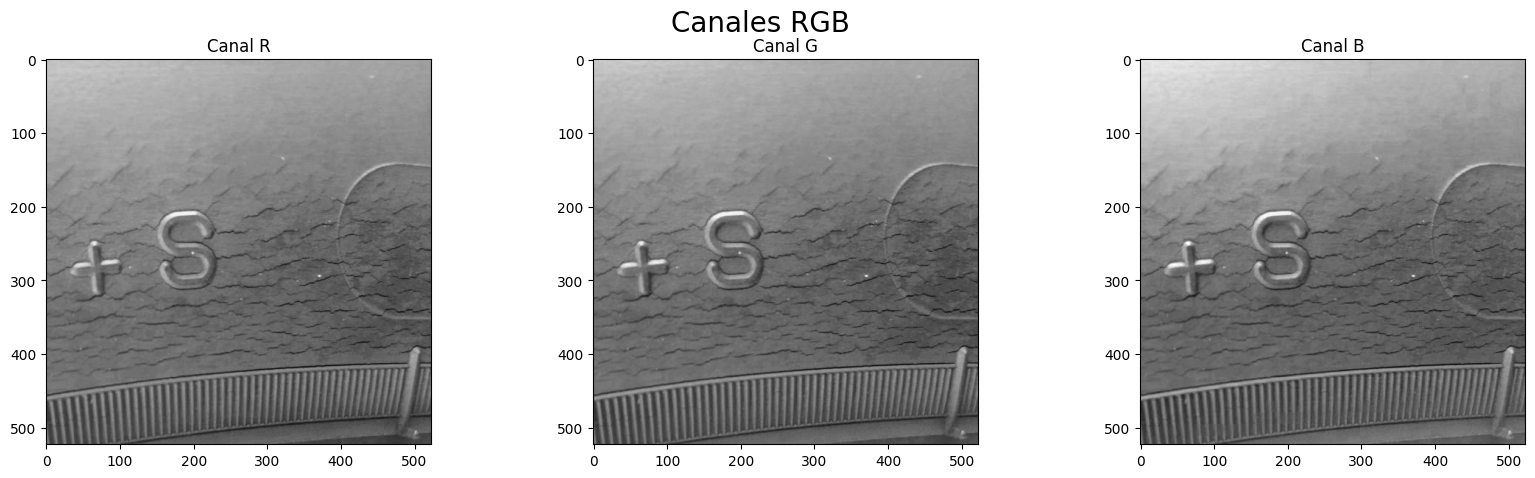

In [ ]:
#Canales RGB

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

#Se crea el subplot 1x3
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

#Se ponen títulos y se muestran las imágenes
fig.suptitle('Canales RGB', fontsize=20)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap="gray")
ax2.set_title('Canal G')
ax2.imshow(img_G,cmap="gray")
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap="gray")

plt.show()

# Conclusiones

En el proceso de análisis de llantas defectuosas, se llevaron a cabo varias etapas clave:

1. **Lectura y carga de imágenes:** En primer lugar, se procedió a cargar todas las imágenes del dataset. Este paso es fundamental para poder trabajar con las imágenes en un entorno de programación.

2. **Redimensionamiento de imágenes:** Para garantizar la uniformidad en el procesamiento, todas las imágenes se redimensionaron a un tamaño estándar. Esto es importante para que todas las imágenes tengan las mismas dimensiones, lo que facilita su manipulación y análisis.

3. **Exploración de espacios de color:** Se realizaron pruebas utilizando diferentes espacios de color, como HSV, YUV y LAB, para analizar cómo afectaban la representación de las imágenes. Sin embargo, se observó que estos espacios de color a veces distorsionaban la imagen o no resaltaban adecuadamente las áreas de interés, como las grietas o el desgaste de las llantas.

4. **Selección del espacio de color RGB:** Tras realizar pruebas exhaustivas, se determinó que el espacio de color RGB era el más adecuado en términos de conservar la integridad de la imagen y proporcionar una representación visual precisa de las llantas.

5. **Elección del canal de color gris:** Para resaltar eficazmente las grietas y el desgaste en las llantas, se optó por seleccionar el canal de color gris (escala de grises) como la representación de color final. Esto permite una visualización más clara de los detalles, lo que facilita la detección de posibles defectos.

En resumen, el proceso de análisis de imágenes de llantas defectuosas y en buen estado involucró la lectura y redimensionamiento de las imágenes, seguido de una selección cuidadosa del espacio de color RGB y el canal de color gris. Esta elección final proporciona una representación efectiva para identificar y evaluar las grietas y el desgaste en las llantas del dataset.

# Referencias

* https://www.kaggle.com/datasets/warcoder/tyre-quality-classification